In [1]:
import pandas as pd
import seaborn as sns

In [2]:
model_names = ['MRNet', 'MRNet-Squeeze', 'MRNet-Attend', 'MRNet-SqueezeAttend']

In [3]:
dfs = {
    name: pd.read_csv('/mnt/ensemble_preds/{}_ensemble_preds.csv'.format(name))
    for name in model_names
}
dfs['MRNet'].head()

,abnormal,abnormal_truth,acl,acl_truth,meniscus,meniscus_truth
0,0.230255,0.0,0.096320,0.0,0.137780,0.0
1,0.291873,0.0,0.125888,0.0,0.200391,0.0
2,0.363111,0.0,0.258895,0.0,0.180650,0.0
3,0.201513,0.0,0.144357,0.0,0.122091,0.0
4,0.500530,0.0,0.146775,0.0,0.275603,0.0


In [5]:
import numpy as np
np.corrcoef(dfs['MRNet'].abnormal, dfs['MRNet-Squeeze'].abnormal)

array([[1.        , 0.96478743],
       [0.96478743, 1.        ]])

In [9]:
abnormal = np.corrcoef(np.vstack(
    [dfs[name].abnormal for name in model_names]
))

In [10]:
acl = np.corrcoef(np.vstack(
    [dfs[name].acl for name in model_names]
))

In [11]:
meniscus = np.corrcoef(np.vstack(
    [dfs[name].meniscus for name in model_names]
))

In [12]:
abnormal_df = pd.DataFrame(data=abnormal, index=model_names, columns=model_names)
abnormal_df.head()

,MRNet,MRNet-Squeeze,MRNet-Attend,MRNet-SqueezeAttend
MRNet,1.000000,0.964787,0.961950,0.973633
MRNet-Squeeze,0.964787,1.000000,0.959717,0.961703
MRNet-Attend,0.961950,0.959717,1.000000,0.956567
MRNet-SqueezeAttend,0.973633,0.961703,0.956567,1.000000


In [13]:
acl_df = pd.DataFrame(data=acl, index=model_names, columns=model_names)

In [14]:
meniscus_df = pd.DataFrame(data=meniscus, index=model_names, columns=model_names)

In [19]:
_min = np.min(np.vstack([abnormal, acl, meniscus]))
_min

0.8572931260795452

In [5]:
import matplotlib.pyplot as plt

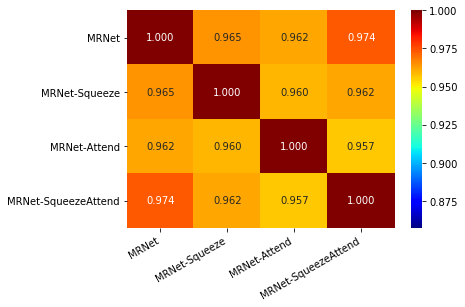

In [31]:
sns.heatmap(abnormal_df, cmap='jet', vmin=_min, annot=True, fmt='.3f');
plt.xticks(rotation=30, ha='right');

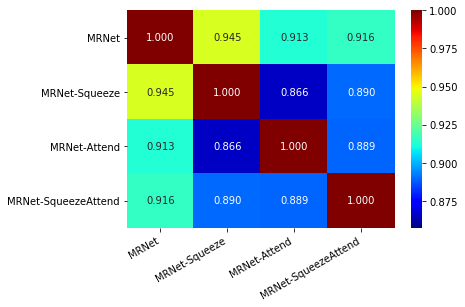

In [32]:
sns.heatmap(acl_df, cmap='jet', vmin=_min, annot=True, fmt='.3f');
plt.xticks(rotation=30, ha='right');

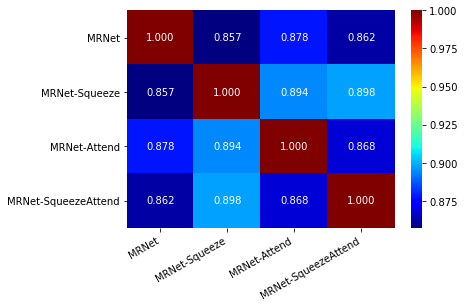

In [33]:
sns.heatmap(meniscus_df, cmap='jet', vmin=_min, annot=True, fmt='.3f');
plt.xticks(rotation=30, ha='right');

In [3]:
dfs = {
    name: pd.read_csv('/mnt/evals/{}/test_preds.csv'.format(name))
    for name in model_names
}
dfs['MRNet'].head()

,axial_abnormal_label,axial_abnormal_pred,axial_acl_label,axial_acl_pred,axial_meniscus_label,axial_meniscus_pred,case,coronal_abnormal_label,coronal_abnormal_pred,coronal_acl_label,coronal_acl_pred,coronal_meniscus_label,coronal_meniscus_pred,sagittal_abnormal_label,sagittal_abnormal_pred,sagittal_acl_label,sagittal_acl_pred,sagittal_meniscus_label,sagittal_meniscus_pred
0,0.0,0.016620,0.0,0.033500,0.0,0.032092,"('1130.npy',)",0.0,0.076163,0.0,0.154288,0.0,0.230164,0.0,0.144339,0.0,0.098307,0.0,0.100310
1,0.0,0.100579,0.0,0.147444,0.0,0.102933,"('1131.npy',)",0.0,0.224268,0.0,0.203186,0.0,0.462576,0.0,0.079022,0.0,0.081200,0.0,0.135492
2,0.0,0.074459,0.0,0.339609,0.0,0.130601,"('1132.npy',)",0.0,0.386555,0.0,0.209052,0.0,0.309951,0.0,0.162385,0.0,0.390719,0.0,0.168754
3,0.0,0.037362,0.0,0.170787,0.0,0.072004,"('1133.npy',)",0.0,0.027163,0.0,0.252652,0.0,0.055660,0.0,0.038546,0.0,0.126584,0.0,0.022038
4,0.0,0.222094,0.0,0.220223,0.0,0.181033,"('1134.npy',)",0.0,0.435256,0.0,0.236765,0.0,0.658722,0.0,0.350306,0.0,0.057642,0.0,0.139093


In [4]:
import numpy as np

In [7]:
diagnoses = ['abnormal', 'acl', 'meniscus']
sequences = ['axial', 'coronal', 'sagittal']

corr_dfs = {}

for diagnosis in diagnoses:
    for sequence in sequences:
        data = np.corrcoef(np.vstack(
            [dfs[name][f'{sequence}_{diagnosis}_pred'] for name in model_names]
        ))
        df = pd.DataFrame(data=data, index=model_names, columns=model_names)
        corr_dfs[f'{sequence}_{diagnosis}'] = df

In [11]:
_min = np.min(np.vstack([df.values for df in corr_dfs.values()]))

abnormal axial


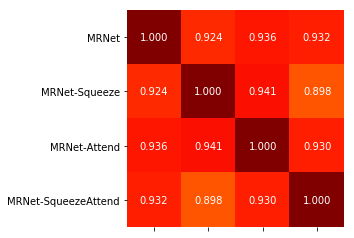

abnormal coronal


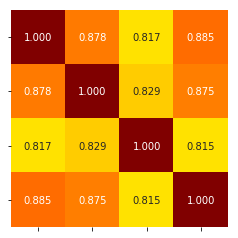

abnormal sagittal


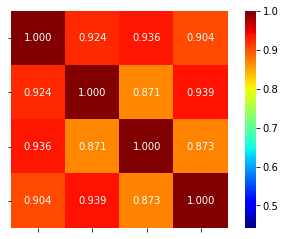

acl axial


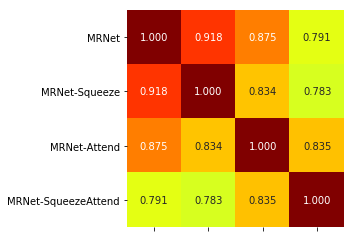

acl coronal


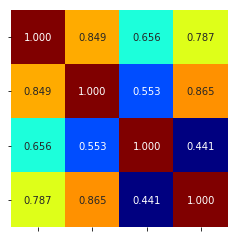

acl sagittal


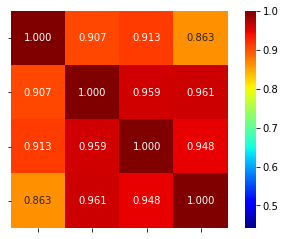

meniscus axial


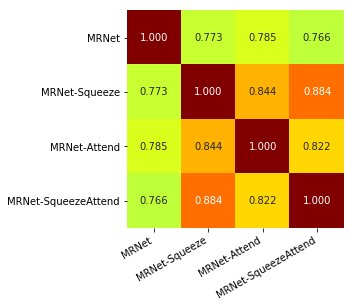

meniscus coronal


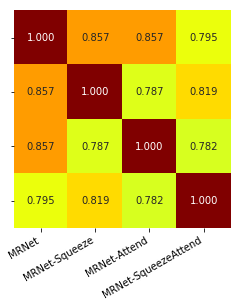

meniscus sagittal


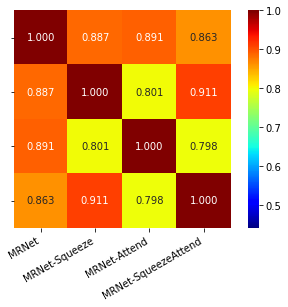

In [15]:
for diagnosis in diagnoses:
    for sequence in sequences:
        print(f'{diagnosis} {sequence}')
        cbar = sequence == 'sagittal'
        square = sequence != 'sagittal'
        hm = sns.heatmap(
            corr_dfs[f'{sequence}_{diagnosis}'], cmap='jet', vmin=_min, 
            annot=True, fmt='.3f', cbar=cbar, square=True
        );
        if diagnosis == 'meniscus':
            plt.xticks(rotation=30, ha='right');
        else:
            hm.set(xticklabels=[])
            
        if sequence != 'axial':
            hm.set(yticklabels=[])
            
        plt.show();